In [ ]:
!pip install pycaret

In [ ]:
%pip install scikit_learn

In [ ]:
%pip install seaborn

In [13]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
data = fetch_california_housing()
data_frame = pd.DataFrame(data.data, columns = data.feature_names)
data_frame['MedHouseValue'] = data.target * 100000 #Para pasar a las unidades adecuadas
data_frame

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseValue
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,452600.0
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,358500.0
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,352100.0
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,341300.0
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,342200.0
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,78100.0
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,77100.0
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,92300.0
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,84700.0


In [15]:
def delete_outliers(data_frame, column):
  first_Q = data_frame[column].quantile(0.25)
  third_Q = data_frame[column].quantile(0.75)
  IQR = third_Q - first_Q
  data_n = data_frame[~((data_frame[column] < (first_Q-1.5*IQR)) | (data_frame[column] > (first_Q+1.5*IQR)))]
  return data_n

In [16]:
data_frame = delete_outliers(data_frame, 'MedHouseValue')

<Axes: xlabel='MedHouseValue', ylabel='Count'>

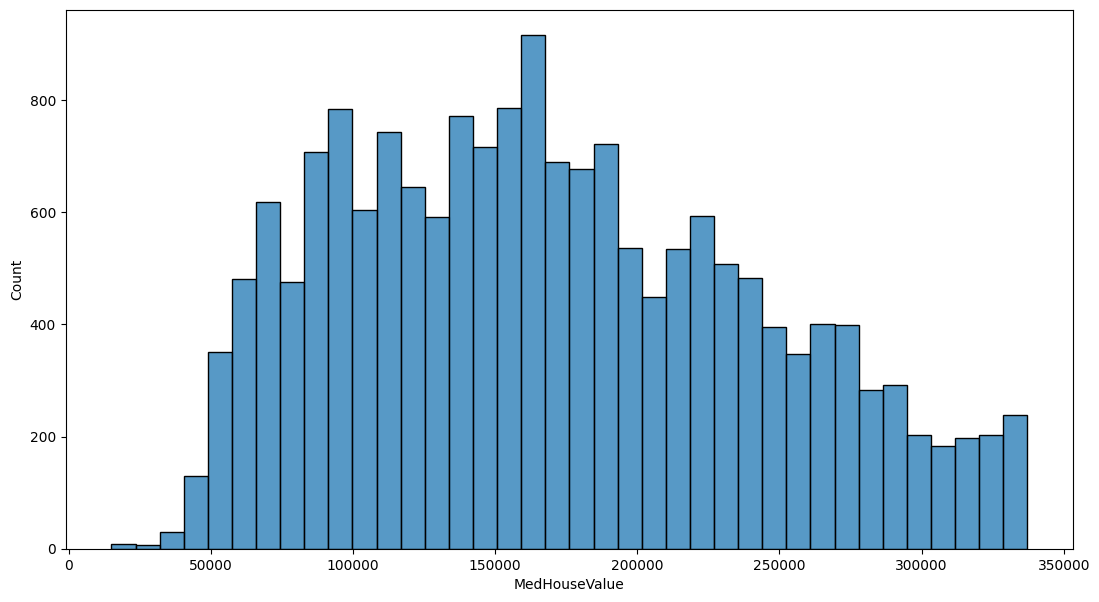

In [17]:
plt.figure(figsize = (13,7))
sns.histplot(data_frame['MedHouseValue'])

In [19]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data_frame, test_size = 0.25, random_state=42, shuffle = True)

In [20]:
from pycaret.regression import *
pycar = setup(train, target = 'MedHouseValue')
#pycar = setup(train, target = 'MedHouseValue', remove_outliers=True) si se quisiera eliminar los outliers con pycaret

,Description,Value
0,Session id,7855
1,Target,MedHouseValue
2,Target type,Regression
3,Original data shape,"(13266, 9)"
4,Transformed data shape,"(13266, 9)"
5,Transformed train set shape,"(9286, 9)"
6,Transformed test set shape,"(3980, 9)"
7,Numeric features,8
8,Preprocess,True
9,Imputation type,simple


In [21]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,23571.9055,1070996587.3854,32706.2553,0.7939,0.2112,0.1607,1.0230
xgboost,Extreme Gradient Boosting,23938.2439,1104898713.6000,33226.1861,0.7873,0.2175,0.1631,0.4990
et,Extra Trees Regressor,23920.2636,1107861370.3003,33268.2150,0.7869,0.2111,0.1625,2.4300
rf,Random Forest Regressor,25704.7777,1268860541.5010,35603.0268,0.7560,0.2296,0.1782,5.9340
gbr,Gradient Boosting Regressor,27530.1345,1363863244.5605,36899.9279,0.7378,0.2387,0.1894,1.7410
ridge,Ridge Regression,37375.0789,2385941312.0000,48796.0043,0.5396,0.3461,0.2718,0.0240
lar,Least Angle Regression,37373.8312,2386343782.4000,48799.9285,0.5395,0.3417,0.2718,0.0240
llar,Lasso Least Angle Regression,37374.1891,2386265651.2000,48799.1770,0.5395,0.3420,0.2718,0.0240
lasso,Lasso Regression,37374.1750,2386265292.8000,48799.1727,0.5395,0.3419,0.2718,0.0270
lr,Linear Regression,37373.8316,2386343334.4000,48799.9238,0.5395,0.3417,0.2718,0.7710


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

In [22]:
finalize_model(best)

Pipeline(memory=Memory(location=None),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['MedInc', 'HouseAge', 'AveRooms',
                                             'AveBedrms', 'Population',
                                             'AveOccup', 'Latitude',
                                             'Longitude'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=[],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('actual_estimator',
                 LGBMRegressor(n_jobs=-1, random_state=7855))])

In [26]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [24]:
predict_model(best)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,23872.9868,1122803947.4079,33508.2669,0.7857,0.2201,0.1674


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseValue,prediction_label
5836,3.0431,41.0,4.605475,1.098229,1516.0,2.441224,34.200001,-118.339996,262900.0,222160.854628
15213,5.2463,16.0,5.957031,1.091797,1444.0,2.820312,32.959999,-117.120003,156300.0,223949.521420
14442,4.2296,35.0,4.598790,1.020161,1005.0,2.026210,32.799999,-117.250000,275000.0,245491.539683
3921,4.0789,35.0,5.640199,1.017370,1431.0,3.550869,34.200001,-118.559998,196700.0,193973.095220
10887,3.2386,13.0,3.537143,1.089524,838.0,1.596190,33.700001,-117.889999,129200.0,141538.595920
...,...,...,...,...,...,...,...,...,...,...
13245,6.2083,17.0,7.403941,1.051724,1291.0,3.179803,34.119999,-117.650002,242700.0,257717.980930
8614,4.9821,21.0,4.487567,1.100541,2054.0,2.220541,33.869999,-118.379997,292900.0,311352.653793
12202,4.7944,3.0,7.497268,1.169399,1223.0,3.341530,33.610001,-117.160004,215300.0,193728.997192
12362,2.6298,14.0,9.425000,2.020000,1711.0,1.711000,33.790001,-116.480003,145200.0,177998.176463


In [25]:
predict_model(best,test)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,24066.8965,1133753375.7595,33671.2544,0.7868,0.2172,0.1633


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseValue,prediction_label
19458,4.7440,10.0,6.310258,1.124270,3227.0,2.691410,37.660000,-120.930000,148100.0,201317.638074
5000,1.7159,49.0,4.491735,0.993802,1861.0,3.845041,33.990002,-118.279999,95000.0,101235.590508
2898,1.0750,52.0,4.384615,1.000000,158.0,6.076923,35.380001,-119.010002,67500.0,73788.817754
815,4.1719,36.0,5.353488,1.004651,727.0,3.381395,37.610001,-122.040001,187000.0,187924.109207
6958,3.9243,34.0,5.601344,1.026876,2597.0,2.908175,34.000000,-118.059998,219800.0,222727.979825
...,...,...,...,...,...,...,...,...,...,...
2015,2.0043,29.0,4.923323,0.929712,1007.0,3.217252,36.709999,-119.800003,53500.0,56508.610736
896,4.2955,23.0,4.502033,0.965447,1278.0,2.597561,37.529999,-121.959999,218800.0,240650.194356
957,6.4994,18.0,6.634081,1.019731,3126.0,2.803587,37.660000,-121.900002,323000.0,281257.144037
8492,3.4000,27.0,5.049459,1.177743,2099.0,3.244204,33.900002,-118.300003,224100.0,165573.497677
